In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#QQQ data
qqq = yf.download("QQQ", start="2018-01-01", end="2024-12-31")

# close and volume qq data
qqq_prices = qqq[['Close', 'Volume']]  # Optional: add Open/High/Low
qqq_prices.rename(columns={'Adj Close': 'QQQ_Price'}, inplace=True)

qqq.head()


# QQQ flow data


C:\Users\anair26\AppData\Local\Temp\ipykernel_12580\3273086927.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download("QQQ", start="2018-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\anair26\AppData\Local\Temp\ipykernel_12580\3273086927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qqq_prices.rename(columns={'Adj Close': 'QQQ_Price'}, inplace=True)


Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2018-01-02,150.779968,150.818016,148.572822,148.943849,32573300
2018-01-03,152.245010,152.378199,150.894091,150.922630,29383600
2018-01-04,152.511414,152.968059,152.292606,152.768283,24776100
2018-01-05,154.043076,154.147725,152.949025,153.234434,26992300
2018-01-08,154.642502,154.718612,153.986066,154.043145,23159100


In [20]:
# Market sentiment data 

# VIX
vix = yf.download("^VIX", start="2018-01-01", end="2024-12-31")['Close']
vix.name = 'VIX'

vix.head()


C:\Users\anair26\AppData\Local\Temp\ipykernel_12580\191395392.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2018-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^VIX
Date,
2018-01-02,9.77
2018-01-03,9.15
2018-01-04,9.22
2018-01-05,9.22
2018-01-08,9.52


In [38]:
# 2 year yield 
#Load the CSV (replace filename if different)
df_yield = pd.read_csv("DGS2.csv", parse_dates=["observation_date"])

# Rename columns for clarity
df_yield.rename(columns={"observation_date": "Date", "DGS2": "2Y_Yield"}, inplace=True)

df_yield["2Y_Yield"] = pd.to_numeric(df_yield["2Y_Yield"], errors="coerce")# Convert '2Y_Yield' from string to float (FRED uses '.' for missing)
vix['^VIX'] = pd.to_numeric(vix['^VIX'], errors='coerce') 

df_yield.dropna(inplace=True) # Drop any rows with missing yield values
vix.dropna(inplace=True)

df_yield.set_index("Date", inplace=True) # Set Date as index (for merging with other datasets)

df_yield.index = pd.to_datetime(df_yield.index)
vix.index = pd.to_datetime(vix.index)
qqq_prices.index = pd.to_datetime(qqq_prices.index)

# Preview
print(df_yield.head())



            2Y_Yield
Date                
2018-01-02      1.92
2018-01-03      1.94
2018-01-04      1.96
2018-01-05      1.96
2018-01-08      1.96


In [40]:
df = pd.concat([df_yield,qqq_prices,vix],axis=1,join='inner')

# Flatten MultiIndex columns
df.columns = [f"{col[1]}_{col[0]}" if isinstance(col, tuple) else col for col in df.columns]

# Optional: rename to even simpler names
df.rename(columns={
    'QQQ_Close': 'QQQ_Close',
    'QQQ_Volume': 'QQQ_Volume',
    '^VIX': 'VIX'
}, inplace=True)

df.head()

,2Y_Yield,QQQ_Close,QQQ_Volume,VIX
Date,,,,
2018-01-02,1.92,150.779968,32573300,9.77
2018-01-03,1.94,152.245010,29383600,9.15
2018-01-04,1.96,152.511414,24776100,9.22
2018-01-05,1.96,154.043076,26992300,9.22
2018-01-08,1.96,154.642502,23159100,9.52


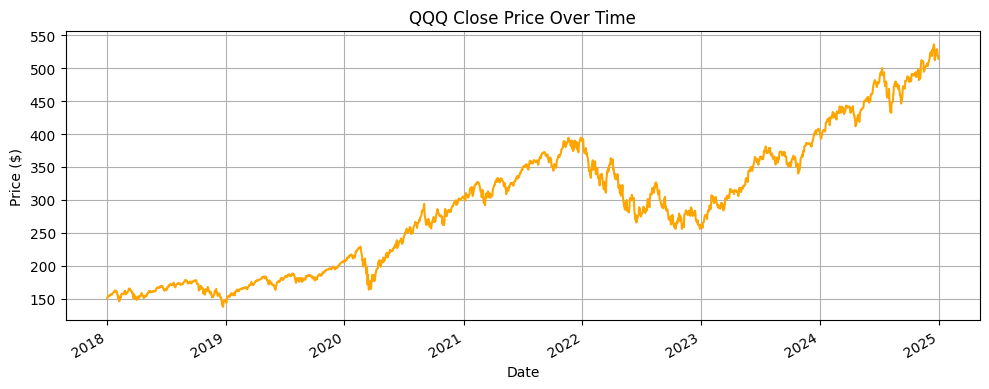

In [ ]:
# first visualization

plt.figure(figsize=(10, 4))
df['QQQ_Close'].plot(color='orange')
plt.title('QQQ Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

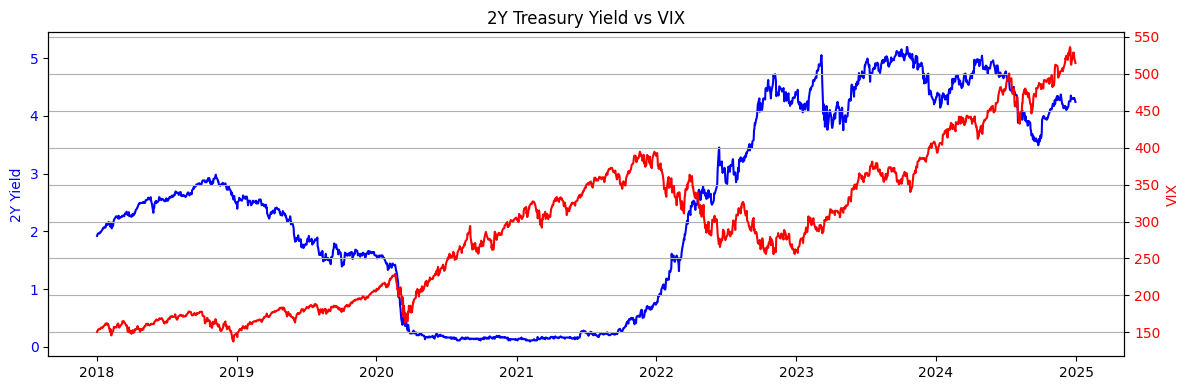

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.set_title("2Y Treasury Yield vs VIX")
ax1.set_ylabel("2Y Yield", color='blue')
ax1.plot(df.index, df['2Y_Yield'], color='blue', label='2Y Yield')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("VIX", color='red')
ax2.plot(df.index, df['VIX'], color='red', label='VIX')
ax2.tick_params(axis='y', labelcolor='red')

plt.grid(True)
plt.tight_layout()
plt.show()

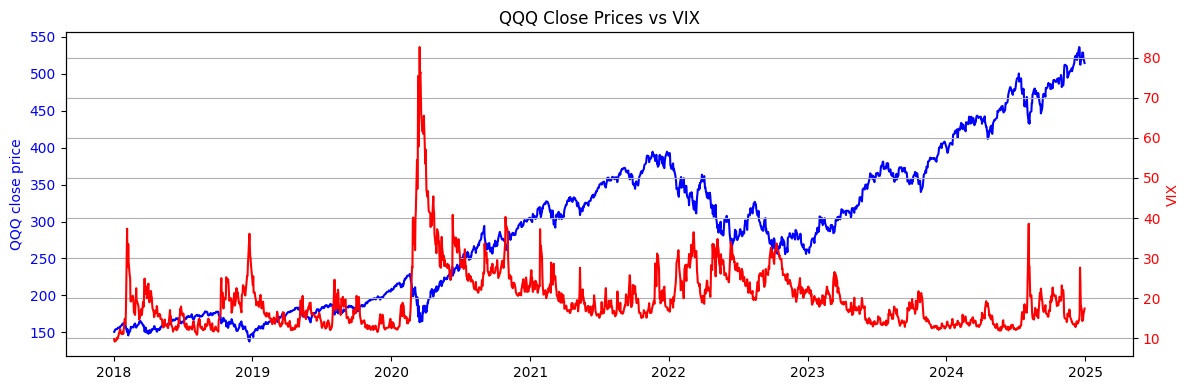

In [46]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.set_title("QQQ Close Prices vs VIX")
ax1.set_ylabel("QQQ close price", color='blue')
ax1.plot(df.index, df['QQQ_Close'], color='blue', label='QQQ Close')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("VIX", color='red')
ax2.plot(df.index, df['VIX'], color='red', label='VIX')
ax2.tick_params(axis='y', labelcolor='red')

plt.grid(True)
plt.tight_layout()
plt.show()

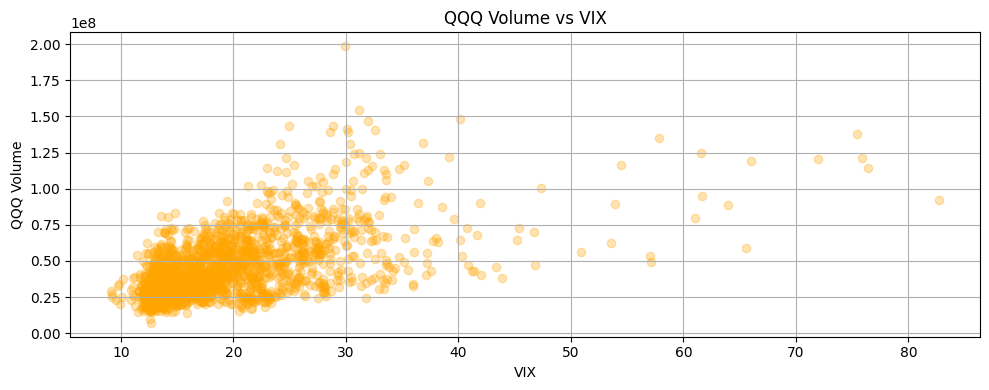

In [49]:
plt.figure(figsize=(10, 4))
plt.scatter(df['VIX'], df['QQQ_Volume'], color='orange', alpha=0.3)
plt.title("QQQ Volume vs VIX")
plt.xlabel("VIX")
plt.ylabel("QQQ Volume")
plt.grid(True)
plt.tight_layout()
plt.show()